<a href="https://colab.research.google.com/github/GaurangRawat/Computer-Vision/blob/main/Image_Processing_Basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from glob import glob

import cv2
import matplotlib.pylab as plt

##Extracting Zip File

In [6]:
!unzip test_set.zip
%ls

Archive:  test_set.zip
   creating: test_set/
   creating: test_set/cats/
  inflating: test_set/cats/_DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg  
  inflating: test_set/cats/cat.4021.jpg  
  inf

##Reading Images

In [7]:
cat_files = glob('test_set/cats/*.jpg')
dog_files = glob('test_set/dogs/*.jpg')

In [8]:
img_mp1 = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mp1.shape, img_cv2.shape

((199, 128, 3), (199, 128, 3))

array([[[128, 128, 136],
        [116, 116, 124],
        [122, 122, 130],
        ...,
        [ 16,  17,  22],
        [ 37,  38,  43],
        [  5,   6,  11]],

       [[124, 124, 132],
        [116, 116, 124],
        [122, 122, 130],
        ...,
        [ 30,  31,  36],
        [ 57,  58,  63],
        [ 17,  18,  23]],

       [[120, 120, 128],
        [115, 115, 123],
        [120, 120, 128],
        ...,
        [ 32,  33,  38],
        [ 70,  71,  76],
        [ 21,  22,  27]],

       ...,

       [[ 15,  15,  15],
        [ 17,  17,  17],
        [ 28,  28,  28],
        ...,
        [ 48,  47,  45],
        [ 38,  37,  35],
        [ 20,  19,  17]],

       [[ 19,  19,  19],
        [ 18,  18,  18],
        [ 24,  24,  24],
        ...,
        [ 50,  49,  47],
        [ 48,  47,  45],
        [ 31,  30,  28]],

       [[ 20,  20,  20],
        [ 18,  18,  18],
        [ 38,  38,  38],
        ...,
        [ 43,  42,  40],
        [ 48,  47,  45],
        [ 46,  45,  43]]], dtype=uint8)
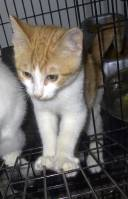

In [9]:
img_mp1

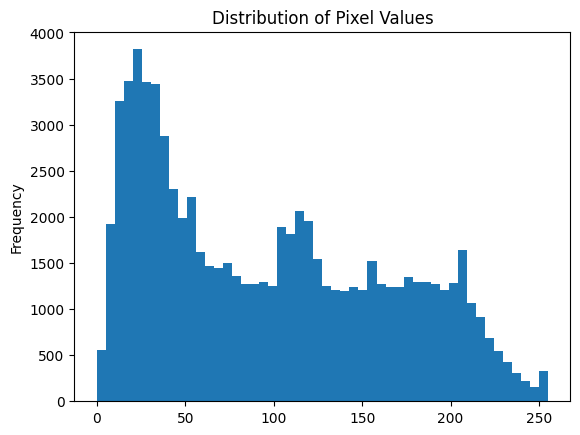

In [10]:
pd.Series(img_mp1.flatten()).plot(kind='hist' , bins=50, title='Distribution of Pixel Values')
plt.show()

##Display Images

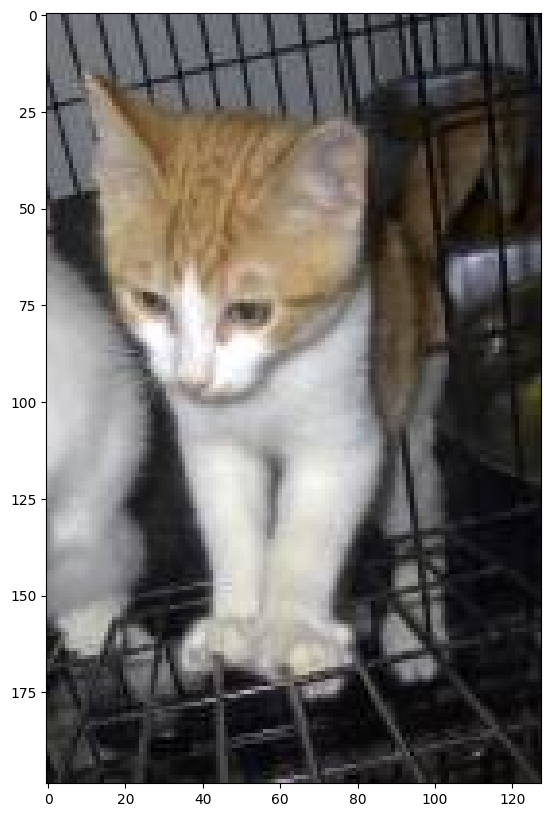

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mp1)
plt.show()

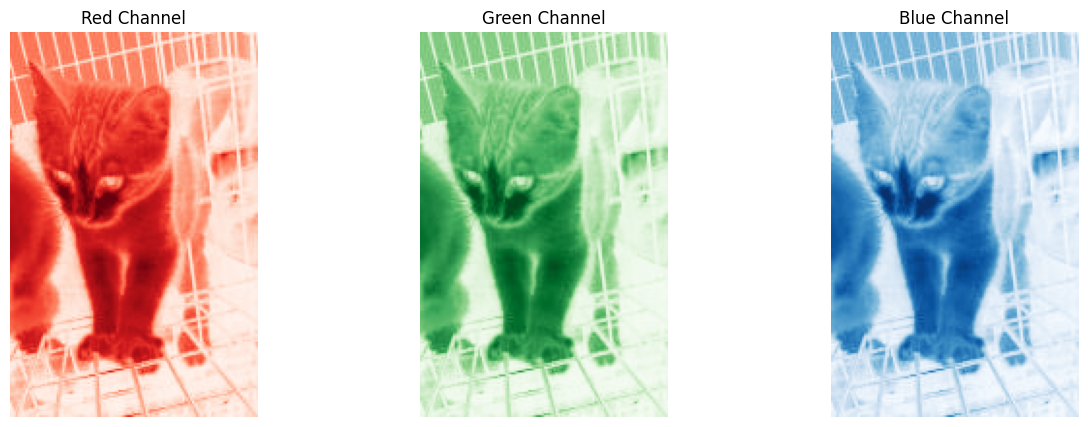

In [13]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(img_mp1[:,:,0], cmap='Reds')
axs[1].imshow(img_mp1[:,:,1], cmap='Greens')
axs[2].imshow(img_mp1[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')
plt.show()

## Image Manipulation

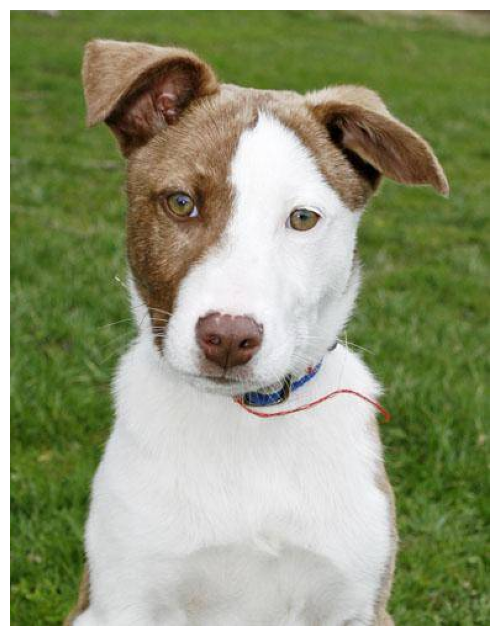

In [22]:
img = plt.imread(dog_files[20])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

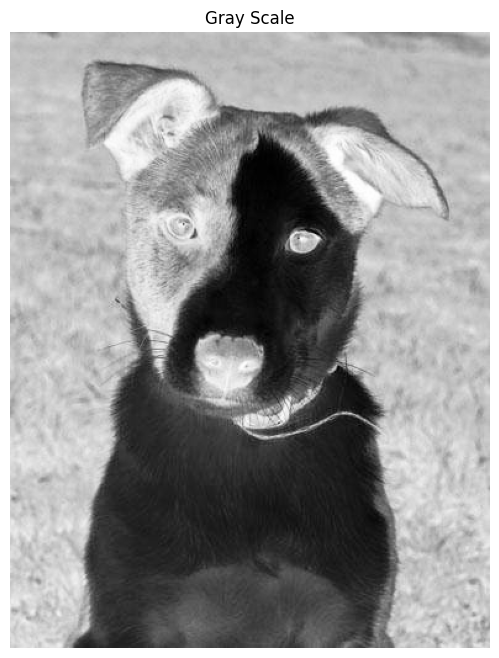

(500, 389)

In [26]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
ax.imshow(img_gray, cmap='Grays')
ax.set_title('Gray Scale')
plt.show()
img_gray.shape

##Resizing and Scaling

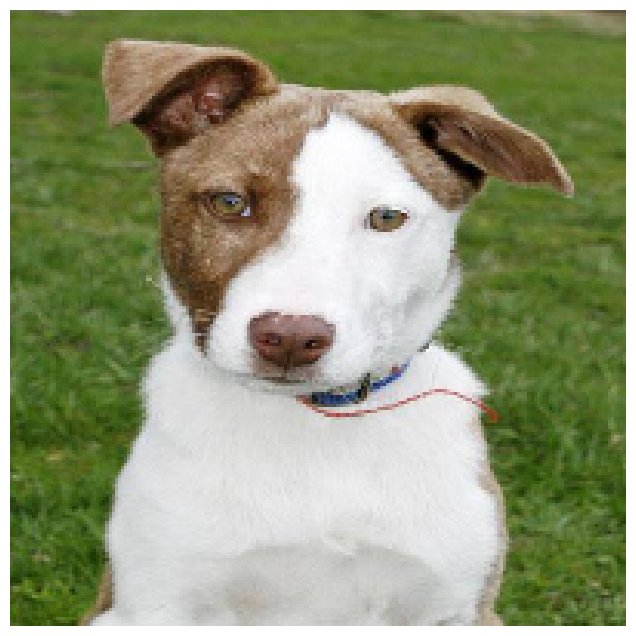

In [28]:
img_resized = cv2.resize(img, (200, 200))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

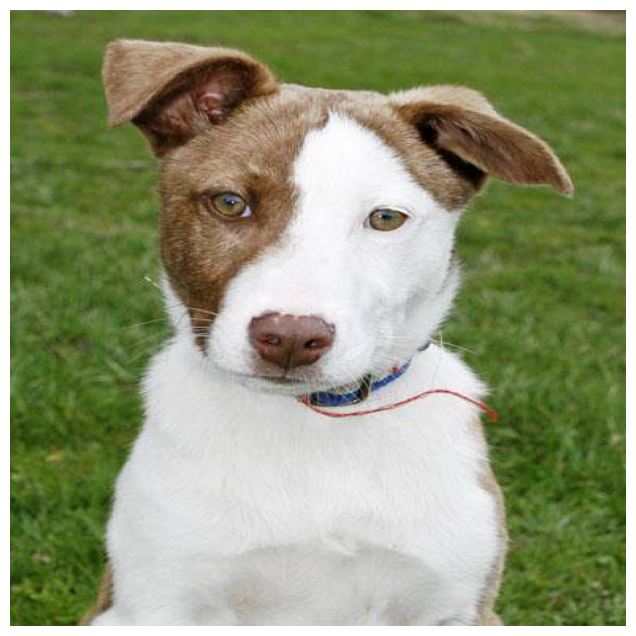

(5000, 5000, 3)

In [36]:
# Different
img_resize = cv2.resize(img, (5000, 5000), interpolation=cv2.INTER_AREA)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()
img_resize.shape

##CV2 Kernels

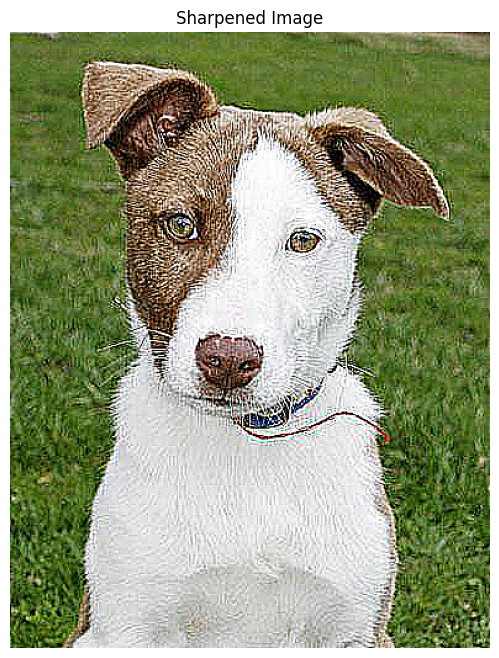

In [46]:
#sharpen image
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(sharpened)
ax.set_title('Sharpened Image')
ax.axis('off')
plt.show()

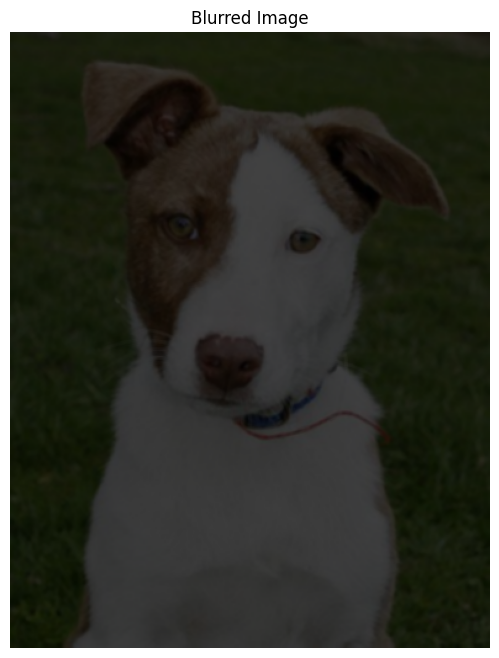

In [50]:
#Blurring Image
kernel_3x3 = np.ones((3,3), dtype=np.float32)/ 35
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(blurred)
ax.set_title('Blurred Image')
ax.axis('off')
plt.show()